# Machine Learning K Means

## Contents:

### 1. Importing libraries and data
### 2. Preprocessing
### 3. Elbow technique
### 4. K-Means Clustering

### 1.0 Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Owner\Documents\Career Foundry\Gun Violence'

In [51]:
# Import data
df_import = pd.read_csv(os.path.join(path, '02 Data', '02 02 Prepared Data', 'gun_violence_clean_addition.csv'))

In [52]:
df_import.shape

(239677, 23)

In [53]:
df_import.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'incident_id', 'date', 'state',
       'city_or_county', 'n_killed', 'n_injured', 'congressional_district',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'date_int', 'Gun Usage', 'region'],
      dtype='object')

In [54]:
df_import = df_import.drop('Unnamed: 0.1', axis = 1)

In [55]:
df_import = df_import.drop('Unnamed: 0', axis = 1)

In [56]:
df_import.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,...,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,date_int,Gun Usage,region
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,40.3467,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,20130101,NaN,Northeast
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,33.9090,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,20130101,NaN,West
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,41.4455,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,20130101,Multiple Guns,Midwest
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,39.6518,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,20130105,NaN,West
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,36.1140,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,20130107,Multiple Guns,South


### 2.0 Preprocessing

#### 2.1 Create dataframe with only numerical categories

In [57]:
# Determine numerical variables
df_import.dtypes

incident_id                   int64
date                         object
state                        object
city_or_county               object
n_killed                      int64
n_injured                     int64
congressional_district      float64
incident_characteristics     object
latitude                    float64
longitude                   float64
n_guns_involved             float64
participant_age              object
participant_age_group        object
participant_gender           object
participant_status           object
participant_type             object
state_house_district        float64
state_senate_district       float64
date_int                      int64
Gun Usage                    object
region                       object
dtype: object

In [58]:
#Create datafram of numerical values
df_num = df_import[['incident_id', 'date_int', 'n_killed', 'n_injured', 'latitude', 'longitude']]

In [59]:
df_num.head()

,incident_id,date_int,n_killed,n_injured,latitude,longitude
0,461105,20130101,0,4,40.3467,40.3467
1,460726,20130101,1,3,33.9090,33.9090
2,478855,20130101,1,3,41.4455,41.4455
3,478925,20130105,4,0,39.6518,39.6518
4,478959,20130107,2,2,36.1140,36.1140


#### 2.2 Standardize Data

In [67]:
# Import scaler from sklearn
from sklearn.preprocessing import StandardScaler

In [68]:
# Create StandardScaler object called scaler
scaler = StandardScaler()

In [69]:
# Fit scaler to dataframe
scaler.fit(df_num)

StandardScaler()

In [70]:
# Transform dataframe to a scaled version
scaled_df = scaler.transform(df_num)

In [72]:
# Assign new dataframe scaled values
df_new = pd.DataFrame(scaled_df, columns=df_num.columns)

In [74]:
df_new.head()

,incident_id,date_int,n_killed,n_injured,latitude,longitude
0,-0.335107,-2.266596,-0.483519,4.803055,0.554999,0.300977
1,-0.336400,-2.266596,1.433006,3.433099,-0.720997,0.023961
2,-0.274554,-2.266596,1.433006,3.433099,0.772789,0.348259
3,-0.274315,-2.266269,7.182580,-0.676767,0.417265,0.271075
4,-0.274199,-2.266105,3.349530,2.063144,-0.283951,0.118843


### 3.0 The elbow technique

In [81]:
# Define the range of potential clusters in the data
num_cl = range(1, 15) 

# Define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [82]:
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] 

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\clust

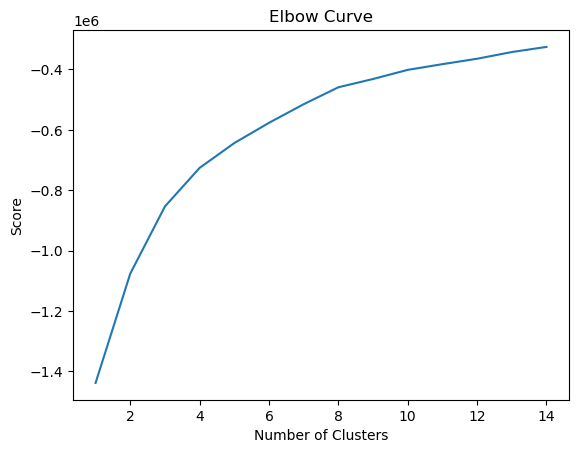

In [83]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve of the elbow curve starts at two and continues until eight when the line starts to flatten out.  The curve starts to flatten at four, therefor that is the best number of clusters to use.

### 4.0 K-Means Clustering

#### 4.1 Create clusters

In [105]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [106]:
# Fit the k-means object to the data
kmeans.fit(df_new)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [108]:
#Add column for which cluster each observations belongs to 
df_new['clusters'] = kmeans.fit_predict(df_new)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
# Verify 'clusters' column was appended
df_new.head()

,incident_id,date_int,n_killed,n_injured,latitude,longitude,clusters
0,-0.335107,-2.266596,-0.483519,4.803055,0.554999,0.300977,2
1,-0.336400,-2.266596,1.433006,3.433099,-0.720997,0.023961,2
2,-0.274554,-2.266596,1.433006,3.433099,0.772789,0.348259,2
3,-0.274315,-2.266269,7.182580,-0.676767,0.417265,0.271075,0
4,-0.274199,-2.266105,3.349530,2.063144,-0.283951,0.118843,0


In [110]:
# Frequency of each cluster 
df_new['clusters'].value_counts()

1    99508
2    92833
0    39413
3     7923
Name: clusters, dtype: int64

#### 4.2 Use Scatterplots to Visualize Clusters

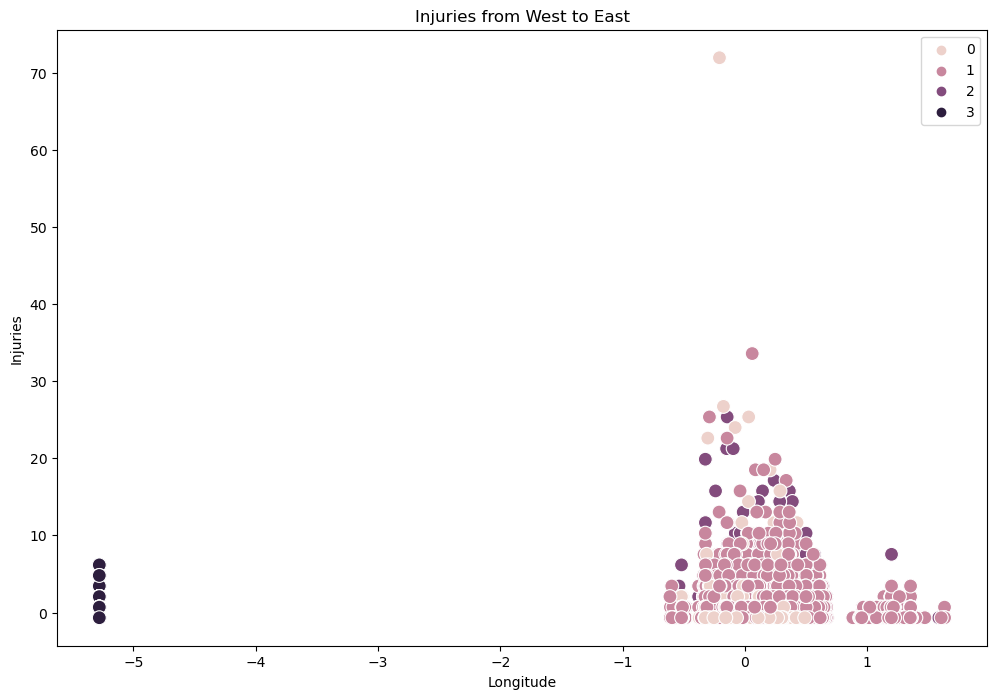

In [129]:
# Plot the clusters for the injuries and longitude
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['longitude'], y=df_new['n_injured'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Longitude') # Label x-axis.
plt.ylabel('Injuries') # Label y-axis.
plt.title('Injuries from West to East')
plt.show()

By using longitude and number of injuries, we can visualize the number of injuries from the far west of the US to the far east.  Through this plot, we can see that there is a lack of either data or injuries in the middle-west states.  Additionally, there is at least one definitive cluster on the west and one on the far east of the US.

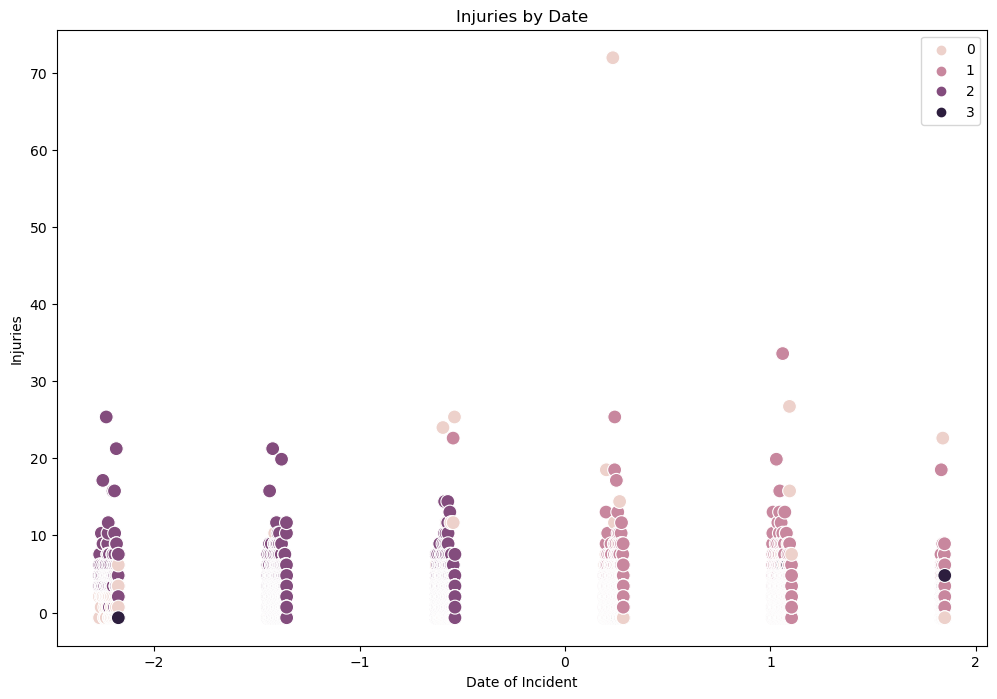

In [132]:
# Plot the clusters for the injuries and date (date is set to scale)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['date_int'], y=df_new['n_injured'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Date of Incident') # Label x-axis.
plt.ylabel('Injuries') # Label y-axis.
plt.title('Injuries by Date')
plt.show()

The scatterplot in this case is cause for additional research since it seems like there are certain clusters that appear earlier in the dates of record and certain clusters that are more recent.  However, another explanation for this could be that not all the data points are visable because of the number of observations in this set.

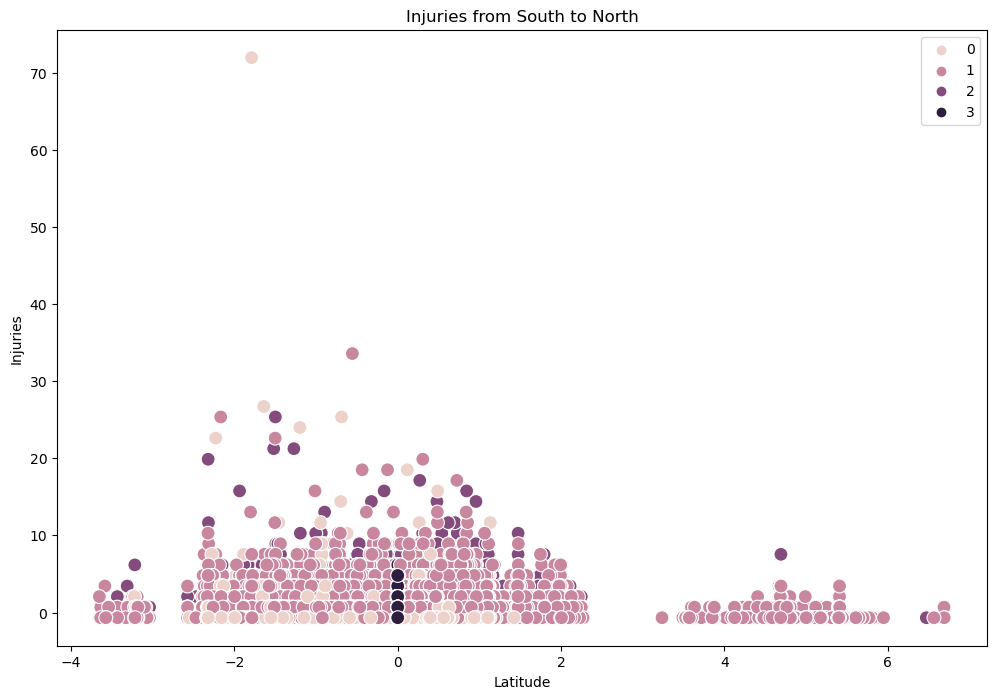

In [134]:
# Plot the clusters for the injuries and line of latitude
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['latitude'], y=df_new['n_injured'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Latitude') # Label x-axis.
plt.ylabel('Injuries') # Label y-axis.
plt.title('Injuries from South to North')
plt.show()

Plotting latitude and injuries makes sense as it allows the observation that, with the exception of the injuries on the western part of the US (cluster 3) the injuries are distributed throughout the northern to southern points of each region.  

#### 4.3 Descriptive Data Grouped by Clusters

In [135]:
df_new.loc[df_new['clusters'] == 3, 'cluster'] = 'black'
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'dark purple'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'

In [136]:
# Frequency of each cluster to verify grouped correctly 
df_new['clusters'].value_counts()

1    99508
2    92833
0    39413
3     7923
Name: clusters, dtype: int64

In [137]:
df_new.groupby('cluster').agg({'date_int':['mean', 'median'], 
                         'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'],
                          'latitude':['mean', 'median'], 
                              'longitude':['mean', 'median']})

date_int            n_killed           n_injured            \
                 mean    median      mean    median      mean    median   
cluster                                                                   
black        0.654975  0.274926  0.312312 -0.483519 -0.008129 -0.676767   
dark purple -1.029088 -1.363357 -0.255724 -0.483519  0.050807 -0.676767   
pink         0.347911  0.250348  1.740424  1.433006 -0.446767 -0.676767   
purple       0.770107  1.020129 -0.475642 -0.483519  0.130203 -0.676767   

                 latitude               longitude            
                     mean        median      mean    median  
cluster                                                      
black       -2.816688e-15 -2.816688e-15 -5.279409 -5.279409  
dark purple  1.863460e-02  2.183846e-01  0.184533  0.227899  
pink        -1.989719e-01 -1.720233e-01  0.137291  0.143142  
purple       6.142395e-02  2.670345e-01  0.193823  0.238460

The first conclusion that can be drawn from the descriptive data is that each cluster represents a different point in time.  We can use the mean and median to conclude that purple represents the most recent, then black, pink and finally dark purple.  Knowing that information, we can further look at the data in terms of how each variable relates to time, such as location and number of injuries.